# PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Exploratory Data Analysis (EDA):

In [4]:
df=pd.read_csv('wine.csv')

In [5]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.shape

(178, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
target=df[['Type']]

In [12]:
feature=df.drop(columns='Type')

In [13]:
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [14]:
feature

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


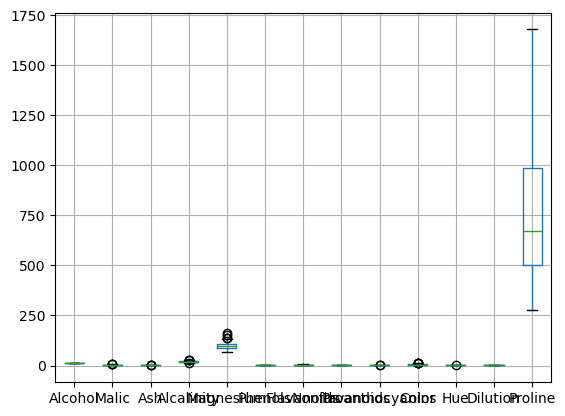

In [15]:
feature.boxplot()
plt.show()

In [16]:
def outlier_capping(feature,column):
    Q1=feature[column].quantile(0.25)
    Q3=feature[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    feature[column]=feature[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in feature.select_dtypes(['int','float']).columns:
    outlier_capping(feature,col)

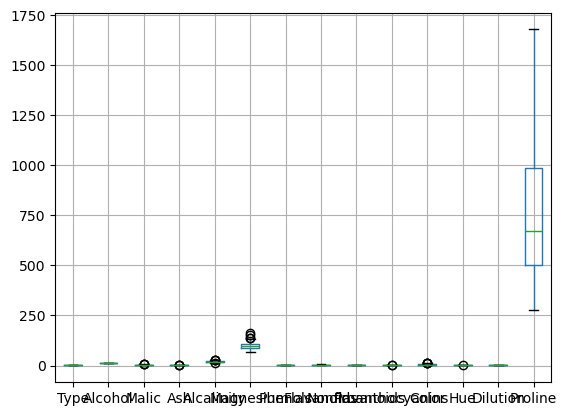

In [17]:
df.boxplot()
plt.show()

In [18]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif=pd.DataFrame()

In [21]:
vif['columns']=feature.columns

In [22]:
vif['VIF']=[variance_inflation_factor(feature.values,i) for i in range(len(feature.columns))]

In [23]:
vif

,columns,VIF
0,Alcohol,215.403906
1,Malic,9.088827
2,Ash,174.078577
3,Alcalinity,74.452421
4,Magnesium,76.390061
5,Phenols,62.310528
6,Flavanoids,35.052101
7,Nonflavanoids,16.411264
8,Proanthocyanins,17.672277
9,Color,17.709491


In [24]:
feature

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Task 2: Dimensionality Reduction with PCA:

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
std_sca=StandardScaler()

In [28]:
feature=pd.DataFrame(std_sca.fit_transform(feature),columns=feature.columns)

In [29]:
feature

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.709072,0.316696,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.180674,-1.399735,-1.231206,-0.021952
174,0.493343,1.439792,0.430781,1.074241,0.188156,-0.793334,-1.284344,0.549108,-0.316336,1.003253,-1.134784,-1.485445,0.009893
175,0.332758,1.777051,-0.405838,0.159191,1.533804,-1.129824,-1.344582,0.549108,-0.424137,2.289557,-1.620528,-1.485445,0.280575
176,0.209232,0.236596,0.012471,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.890359,-1.576370,-1.400699,0.296498


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=100)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133, 1)
(45, 1)


In [33]:
from sklearn.decomposition import PCA

In [34]:
pca=PCA(n_components=10)

In [35]:
pca

PCA(n_components=10)

In [36]:
pca.fit(x_train)

PCA(n_components=10)

In [37]:
pca.fit(x_test)

PCA(n_components=10)

In [38]:
x_train_new=pca.transform(x_train)

In [39]:
x_test_new=pca.transform(x_test)

In [40]:
print(x_train_new.shape)
print(x_train_new.shape)

(133, 10)
(133, 10)


In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
log_model=LogisticRegression(multi_class='ovr')

In [44]:
log_model.fit(x_train_new,y_train)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [45]:
y_pred= log_model.predict(x_test_new)
y_pred

array([2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3,
       1], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [47]:
pca.explained_variance_ratio_

array([0.38242037, 0.1892909 , 0.11206713, 0.08776061, 0.05927251,
       0.04846026, 0.04241708, 0.02402888, 0.01820328, 0.01322671])

In [71]:
pca = PCA(n_components=2)


In [75]:
pca_features = pca.fit_transform(feature)

In [77]:
from sklearn.cluster import KMeans

In [81]:
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_original = kmeans_original.fit_predict(feature)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [83]:
print(clusters_original[:10])

[2 2 2 2 2 2 2 2 2 2]


In [85]:
pca_original_viz = PCA(n_components=2)
pca_original_transformed = pca_original_viz.fit_transform(feature)

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

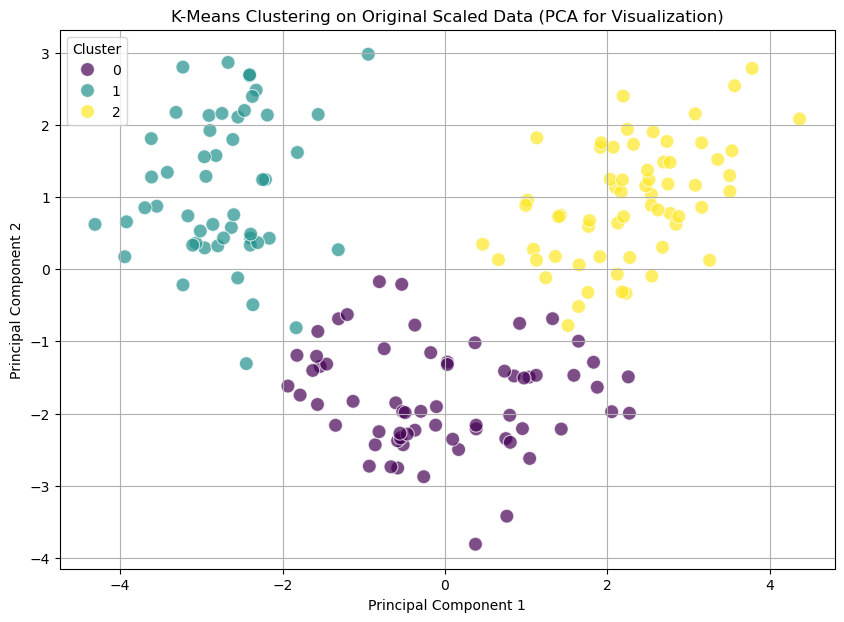

In [87]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_original_transformed[:, 0], y=pca_original_transformed[:, 1], hue=clusters_original, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering on Original Scaled Data (PCA for Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [97]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [99]:
silhouette_original = silhouette_score(feature, clusters_original)
davies_bouldin_original = davies_bouldin_score(feature, clusters_original)
print(f"Silhouette Score (Original data): {silhouette_original:.3f}")
print(f"Davies-Bouldin Index (Original data): {davies_bouldin_original:.3f}")

Silhouette Score (Original data): 0.285
Davies-Bouldin Index (Original data): 1.382


In [103]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(feature)

In [105]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(pca_features)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [107]:
print(clusters_pca[:10])

[2 2 2 2 2 2 2 2 2 2]


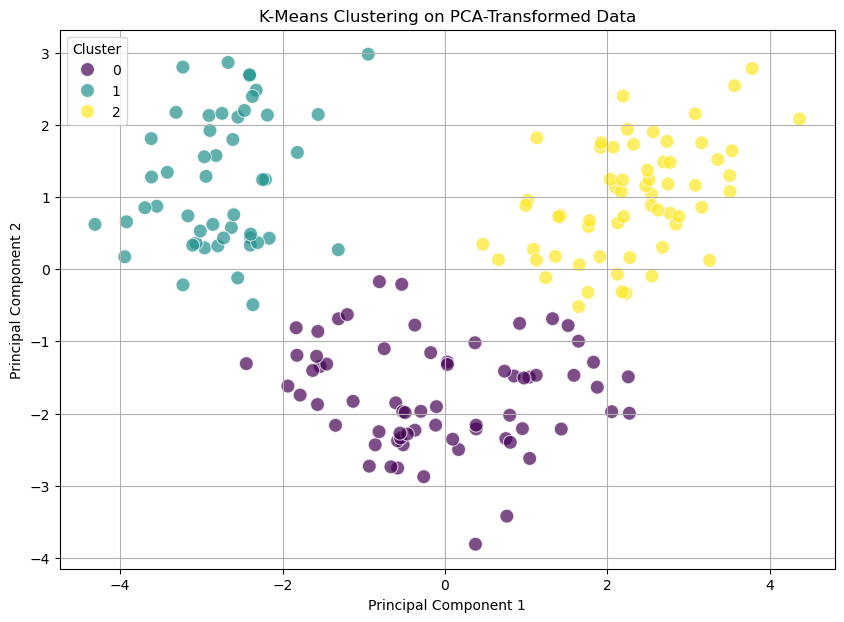

In [109]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters_pca, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [111]:
silhouette_pca = silhouette_score(pca_features, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_features, clusters_pca)
print(f"Silhouette Score (PCA data): {silhouette_pca:.3f}")
print(f"Davies-Bouldin Index (PCA data): {davies_bouldin_pca:.3f}")

Silhouette Score (PCA data): 0.561
Davies-Bouldin Index (PCA data): 0.598


In [115]:
silhouette_original = silhouette_score(feature, clusters_original)
davies_bouldin_original = davies_bouldin_score(feature, clusters_original)
print(f"Silhouette Score (Original data): {silhouette_original:.3f}")
print(f"Davies-Bouldin Index (Original data): {davies_bouldin_original:.3f}")

Silhouette Score (Original data): 0.285
Davies-Bouldin Index (Original data): 1.382


In [117]:
print("\n--- Comparison of Clustering Results ---")
print("A visual comparison of the two plots above will show how the clusters are formed in each scenario.")
print("The Silhouette Score and Davies-Bouldin Index provide quantitative measures for comparison.")
print(f"PCA Data Clustering - Silhouette Score: {silhouette_pca:.3f}, Davies-Bouldin Index: {davies_bouldin_pca:.3f}")
print(f"Original Data Clustering - Silhouette Score: {silhouette_original:.3f}, Davies-Bouldin Index: {davies_bouldin_original:.3f}")
print("A higher Silhouette Score indicates better-defined clusters, while a lower Davies-Bouldin Index indicates better clustering.")
print("Further analysis would involve discussing similarities/differences in cluster separation and compactness.")


--- Comparison of Clustering Results ---
A visual comparison of the two plots above will show how the clusters are formed in each scenario.
The Silhouette Score and Davies-Bouldin Index provide quantitative measures for comparison.
PCA Data Clustering - Silhouette Score: 0.561, Davies-Bouldin Index: 0.598
Original Data Clustering - Silhouette Score: 0.285, Davies-Bouldin Index: 1.382
A higher Silhouette Score indicates better-defined clusters, while a lower Davies-Bouldin Index indicates better clustering.
Further analysis would involve discussing similarities/differences in cluster separation and compactness.
